# Basic ML Algorithms (Regression) - Day 5

This notebook will take a deep-dive into regression algorithms, how they work, and the different types.

**Topics:**



1.   Regression Algorithms
2.   Interpreting Model Results
3.   Linear vs Logistic Regression



**Goals:**



1.   Become familiar with different types of regression algorithms.
2.   Identify linear and nonlinear relationships from a scatterplot.
3.   Predict a response from a simple linear regression model.
4.   Predict a response from a multiple linear regression model.
5.   Calculate and interpret a residual.
6.   Distinguish Linear and Logistic Regression.



## Import Packages

The first part of every script!

1.  **Pandas:** Working with datasets. Arguably the most widely-used data-science Python package.

2.  **NumPy:** Scientific computing package for working with vectors & matrices.

3.  **MatplotLib:** Tool for dataset vizualizations.

4.  **Seaborn:** Tool for dataset vizualizations.

5.  **Sci-Kit Learn:** Open-source ML algorithms.

6.  **StatsModels:** Open-source ML algorithms.

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

## Explore Dataset

In this section we will begin to examine linear relationships in our data and how to visualize + interpret these findings.

**Basic EDA & Visualizations**

In [15]:
data = pd.read_csv('/content/housing.csv', index_col=0)

print('SHAPE: ', data.shape)
print()

data.head()

SHAPE:  (546, 12)



,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [14]:
# Examine data-types

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 1 to 546
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 71.6+ KB


In [9]:
# Examine null values

data.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

In [10]:
# Examine attributes

data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,546.0,68121.597070,26702.670926,25000.0,49125.0,62000.0,82000.0,190000.0
lotsize,546.0,5150.265568,2168.158725,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,546.0,2.965201,0.737388,1.0,2.0,3.0,3.0,6.0
bathrms,546.0,1.285714,0.502158,1.0,1.0,1.0,2.0,4.0
stories,546.0,1.807692,0.868203,1.0,1.0,2.0,2.0,4.0
garagepl,546.0,0.692308,0.861307,0.0,0.0,0.0,1.0,3.0


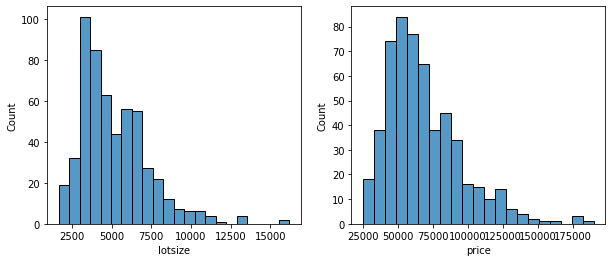

In [12]:
# Examine Dependent & Independent (x, y) Variables

fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(data=data, x='lotsize', ax=ax[0])
sns.histplot(data=data, x='price', ax=ax[1]);

**The Scatter Plot**

***The classic visualization to show the relationship between two quantitative variables is called a scatter plot.***

In a scatterplot, we plot the value of the indepdendent variable and the value of the dependent variable as an (x,y) pair.  

For example, the first observation would be plotted by moving right on the x-axis to 5850 and up along the y-axis direction to 42000. 

Where x=lotsize & y=price.

In [27]:
data.iloc[[0]]

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no


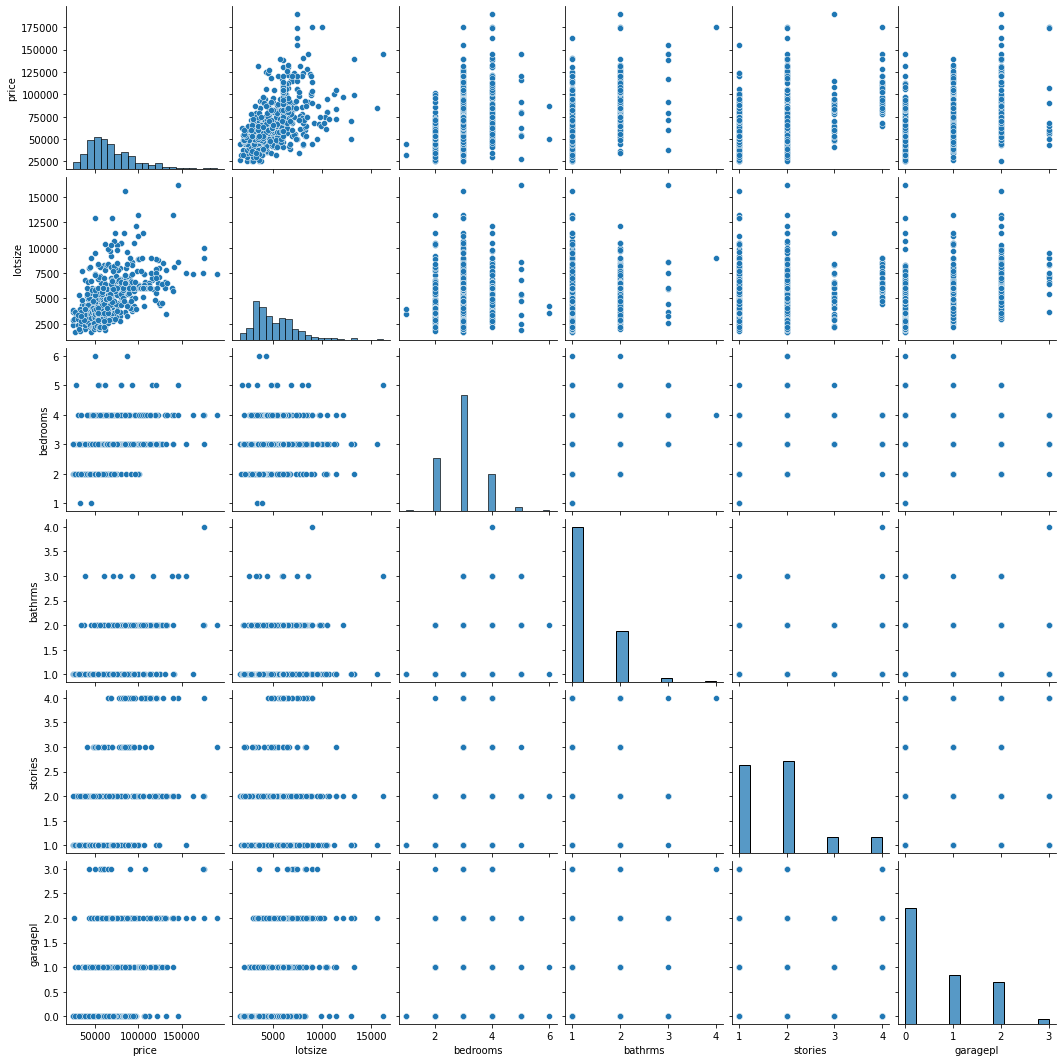

In [26]:
## Visualize all features as (x,y) correlation pairs

sns.pairplot(data)

For now, we are only interested in price & lotsize. We want to see if there is a linear-relationship between the lotsize and the price.

Simple linear regression measures the relationship between one quantitative feature, a quantitative target.

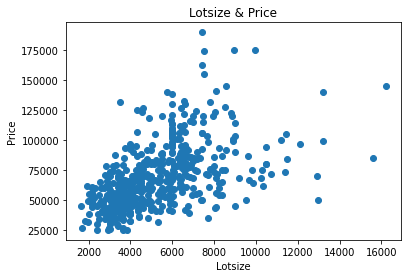

In [16]:
fig, ax = plt.subplots() 

# Plot the scatterplot
ax.scatter(x = data['lotsize'], y = data['price'])

ax.set_title('Lotsize & Price')
ax.set_xlabel('Lotsize')
ax.set_ylabel('Price')

plt.show()

**There appears to be a positive linear relationship.** As we expected - because as the lotsize goes up, generally the price does as well.



How strongly correlated are the lotsize & price?

## Correlation & Linear Relationships

The linear correlation coeffient (pearson correlation) (r) measures the strength and direction of the linear relationship between two quantitative variables.

- Correlation is measured on a scale of -1 to 1. -1 = perfect negative correlation, +1 = perfect positive correlation, 0 = no correlation.
- A correlation |r| > 0.80 is considered strong and a correlation |r| < 0.20 is considered weak.

In [18]:
r = np.corrcoef(data['lotsize'], data['price'])
print(r)

[[1.         0.53579567]
 [0.53579567 1.        ]]


This tells us that the correlation between x and x is 1, and between y and y is 1 (those are the numbers on the diagonal).  The correlation between x and y is 0.54 and the correlation between y and x is 0.54

**The linear correlation between lotsize and price is 0.54.**

This doesn't quite qualify as a strong correlation |r| > 0.80 but it's not weak either |r| < 0.20.  We'll say it's moderate!

Let's look at some other scatterplot patterns and values of correlation for comparison.

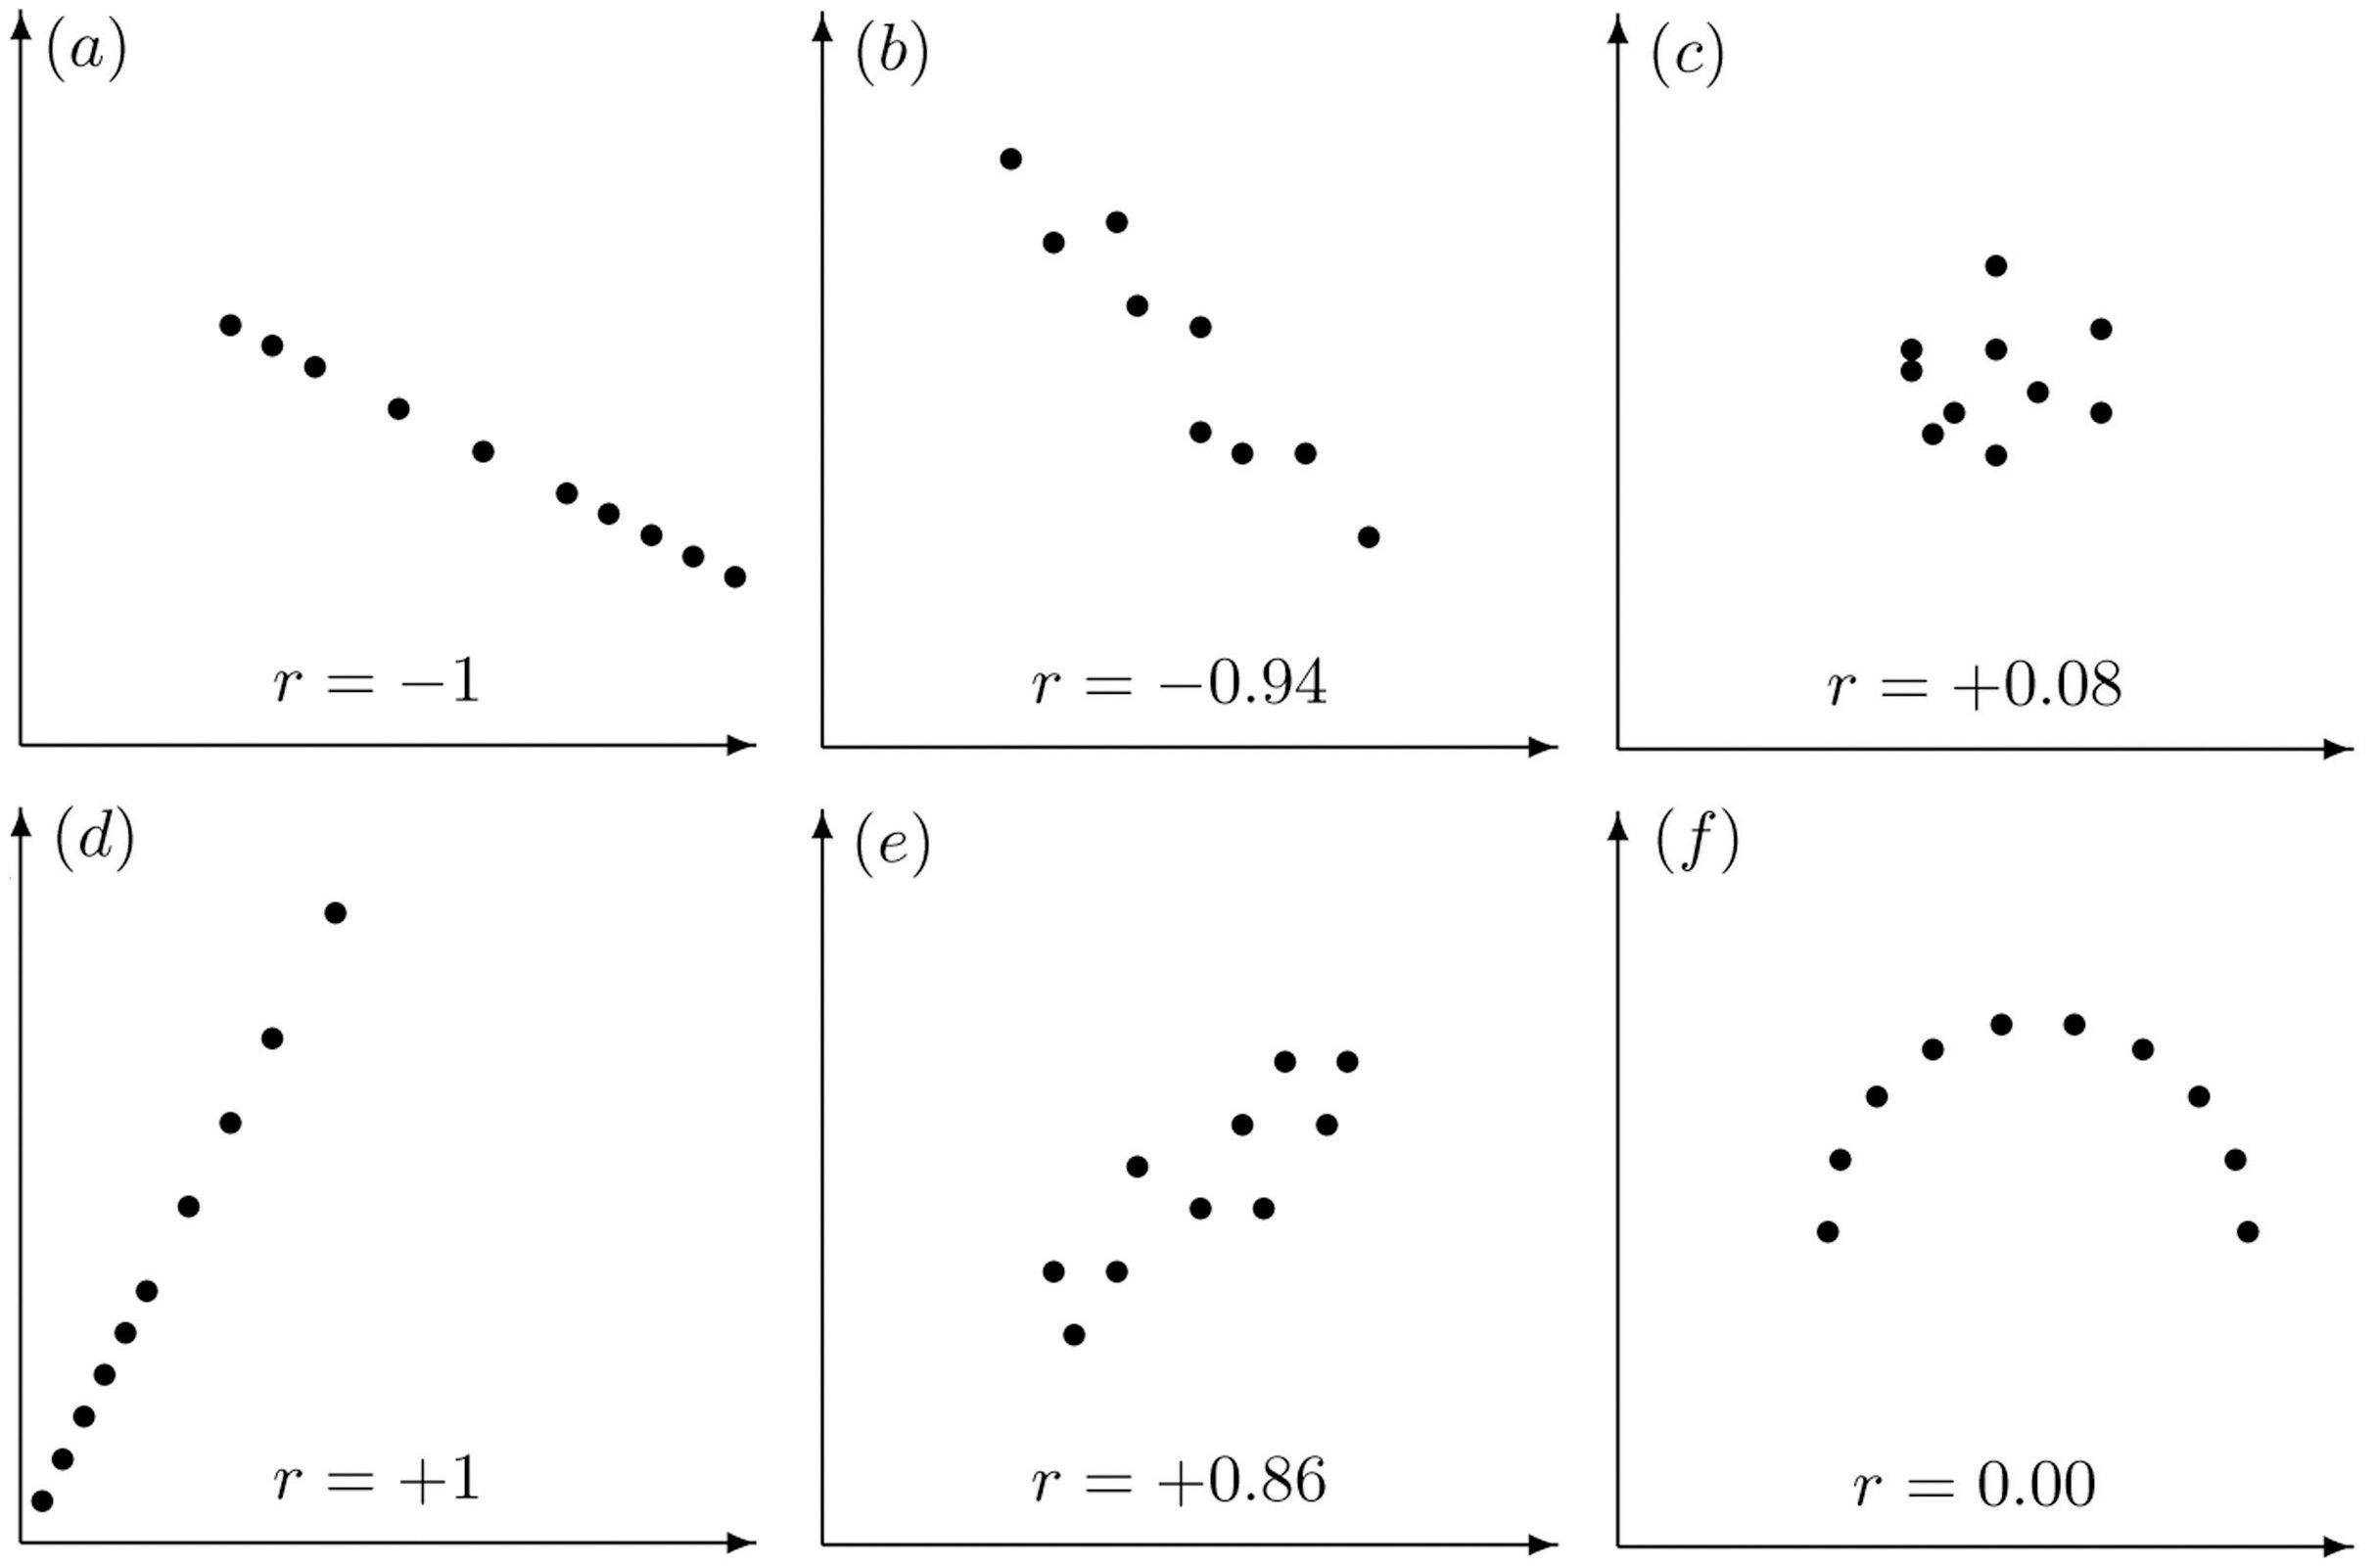

Correlation tells us if there is a linear relationship, and if so, how strongly correlated the two quantitative variables are.

However, we would like to go one step further and see if we can make predictions for the property price, given the lotsize.

We are going to do this by calculating the ***least squares*** regression line (also known as the line of best fit) for the data.

When dealing with real data, the points in a scatterplot will never line up perfectly.  The best model of the relationship between the two variables is the straight line that comes closest to passing through all the points (knowing that it won't actually hit all of them).

The least squares regression line is the function that minimizes the distance from every observed point to the predicted point. This fact has been mathematically proven, although we won't do that here.

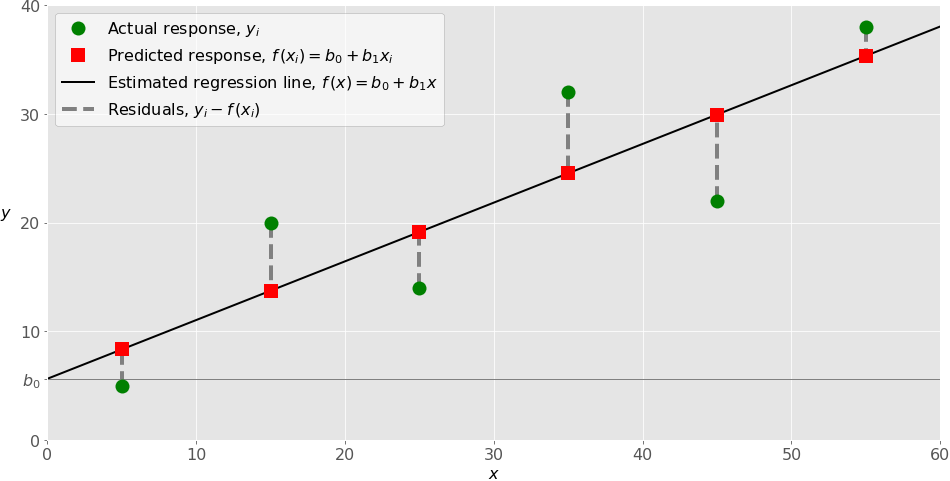

Remember, linear regression has the form: 

\begin{equation}
\hat{y} = \beta_{1}\ast X_{1}+...\beta_{n}\ast X_{n} + \beta_{0}
\end{equation}

**OLS Regression:**

\begin{equation}
\beta_{i} = \frac{\sum_{i}^{n}(X_{i}-\bar{X})(Y_{i}-\bar{Y})}{\sum_{i}^{n}(X_{i}-\bar{X})^{2}}
\end{equation}

Remember, X is just a feature (in our case lotsize), and y is the target (price). 
 
\begin{equation}
\bar{X} = \text{mean of feature X}
\end{equation}
\begin{equation}
X_{i} = \text{value at index i of feature X}
\end{equation}
\begin{equation}
\sum_{i}^{n} = \text{summation of all samples i to n}
\end{equation}

Remember our lesson on the importance of open-source software. This is precisely why. Instead of coding an OLS regression from scratch using that formula, we can use an open-source package (statsmodels) and not worry about all the math!

As long as we understand what is happenning, and we can interpret the results, there is no reason beyond education to code that from scratch.

### Example 1 - Housing Dataset

In [19]:
# enter model in format y ~ x
model = ols('price ~ lotsize', data=data).fit() # calling 'fit' implements the above equations

print(model.params)

Intercept    34136.191565
lotsize          6.598768
dtype: float64


We can write the linear regression model for the relationship between lotsize and price as:

\begin{equation}
\hat{Y} = 34136.19 + (6.59 * X)
\end{equation}

What do these numbers mean, exactly?  

- The **slope** tells us the expected change in y for one-unit change in x.
- The **intercept** tells us the expected value of y when x = 0.




\begin{equation}
\text{Where:}
\end{equation}
\begin{equation}
\text{intercept} = \beta_{0} = 34136.
\end{equation}
\begin{equation}
\text{slope} = \beta_{i} = 6.59
\end{equation}

This means we can expect roughly a $6.59 increase in price for each increment of +1 in lot-size.

**Visualize The Model**

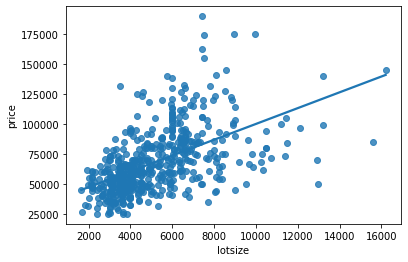

In [20]:
sns.regplot(x='lotsize', y='price', data=data, ci=None)

**Test The Model.**

A property has a lot size of 5200, we want to predict the price.

In [21]:
# specify value of x we'd like to predict
x = 5200

# extract slope / intercept from model
slope = model.params[1]
intercept = model.params[0]

# use model to make predictions
y_hat = intercept + slope * x

print(y_hat)

68449.78302909623


A property with a lot-size of 5200 should cost roughly $68,449.78

**Calculate The Residual**

Let's calculate the residual for the first sample

In [23]:
# View first sample
data.iloc[[0]]

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no


In [25]:
# specify value of x we'd like to predict
x = 5850

# specific value of y we want to use to calculate residual
y = 42000

# extract slope / intercept from model
slope = model.params[1]
intercept = model.params[0]

# use model to make predictions
y_hat = intercept + slope * x

residual = y - y_hat

print(y_hat)
print(residual)

72738.98196211888
-30738.98196211888


Our model has overestimated the cost by about $31,000. 

Some models residuals will be smaller than this - all models are different!

This is why having **good data** is so vital. 

### Example 2 - Sleep Dataset

**Read-in Data**

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/j0sephsasson/Pepsi-Training-Course/main/datasets/sleep.csv', index_col=0)
data.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


We will try to predict total-sleep from para-sleep.

**Explore Data**

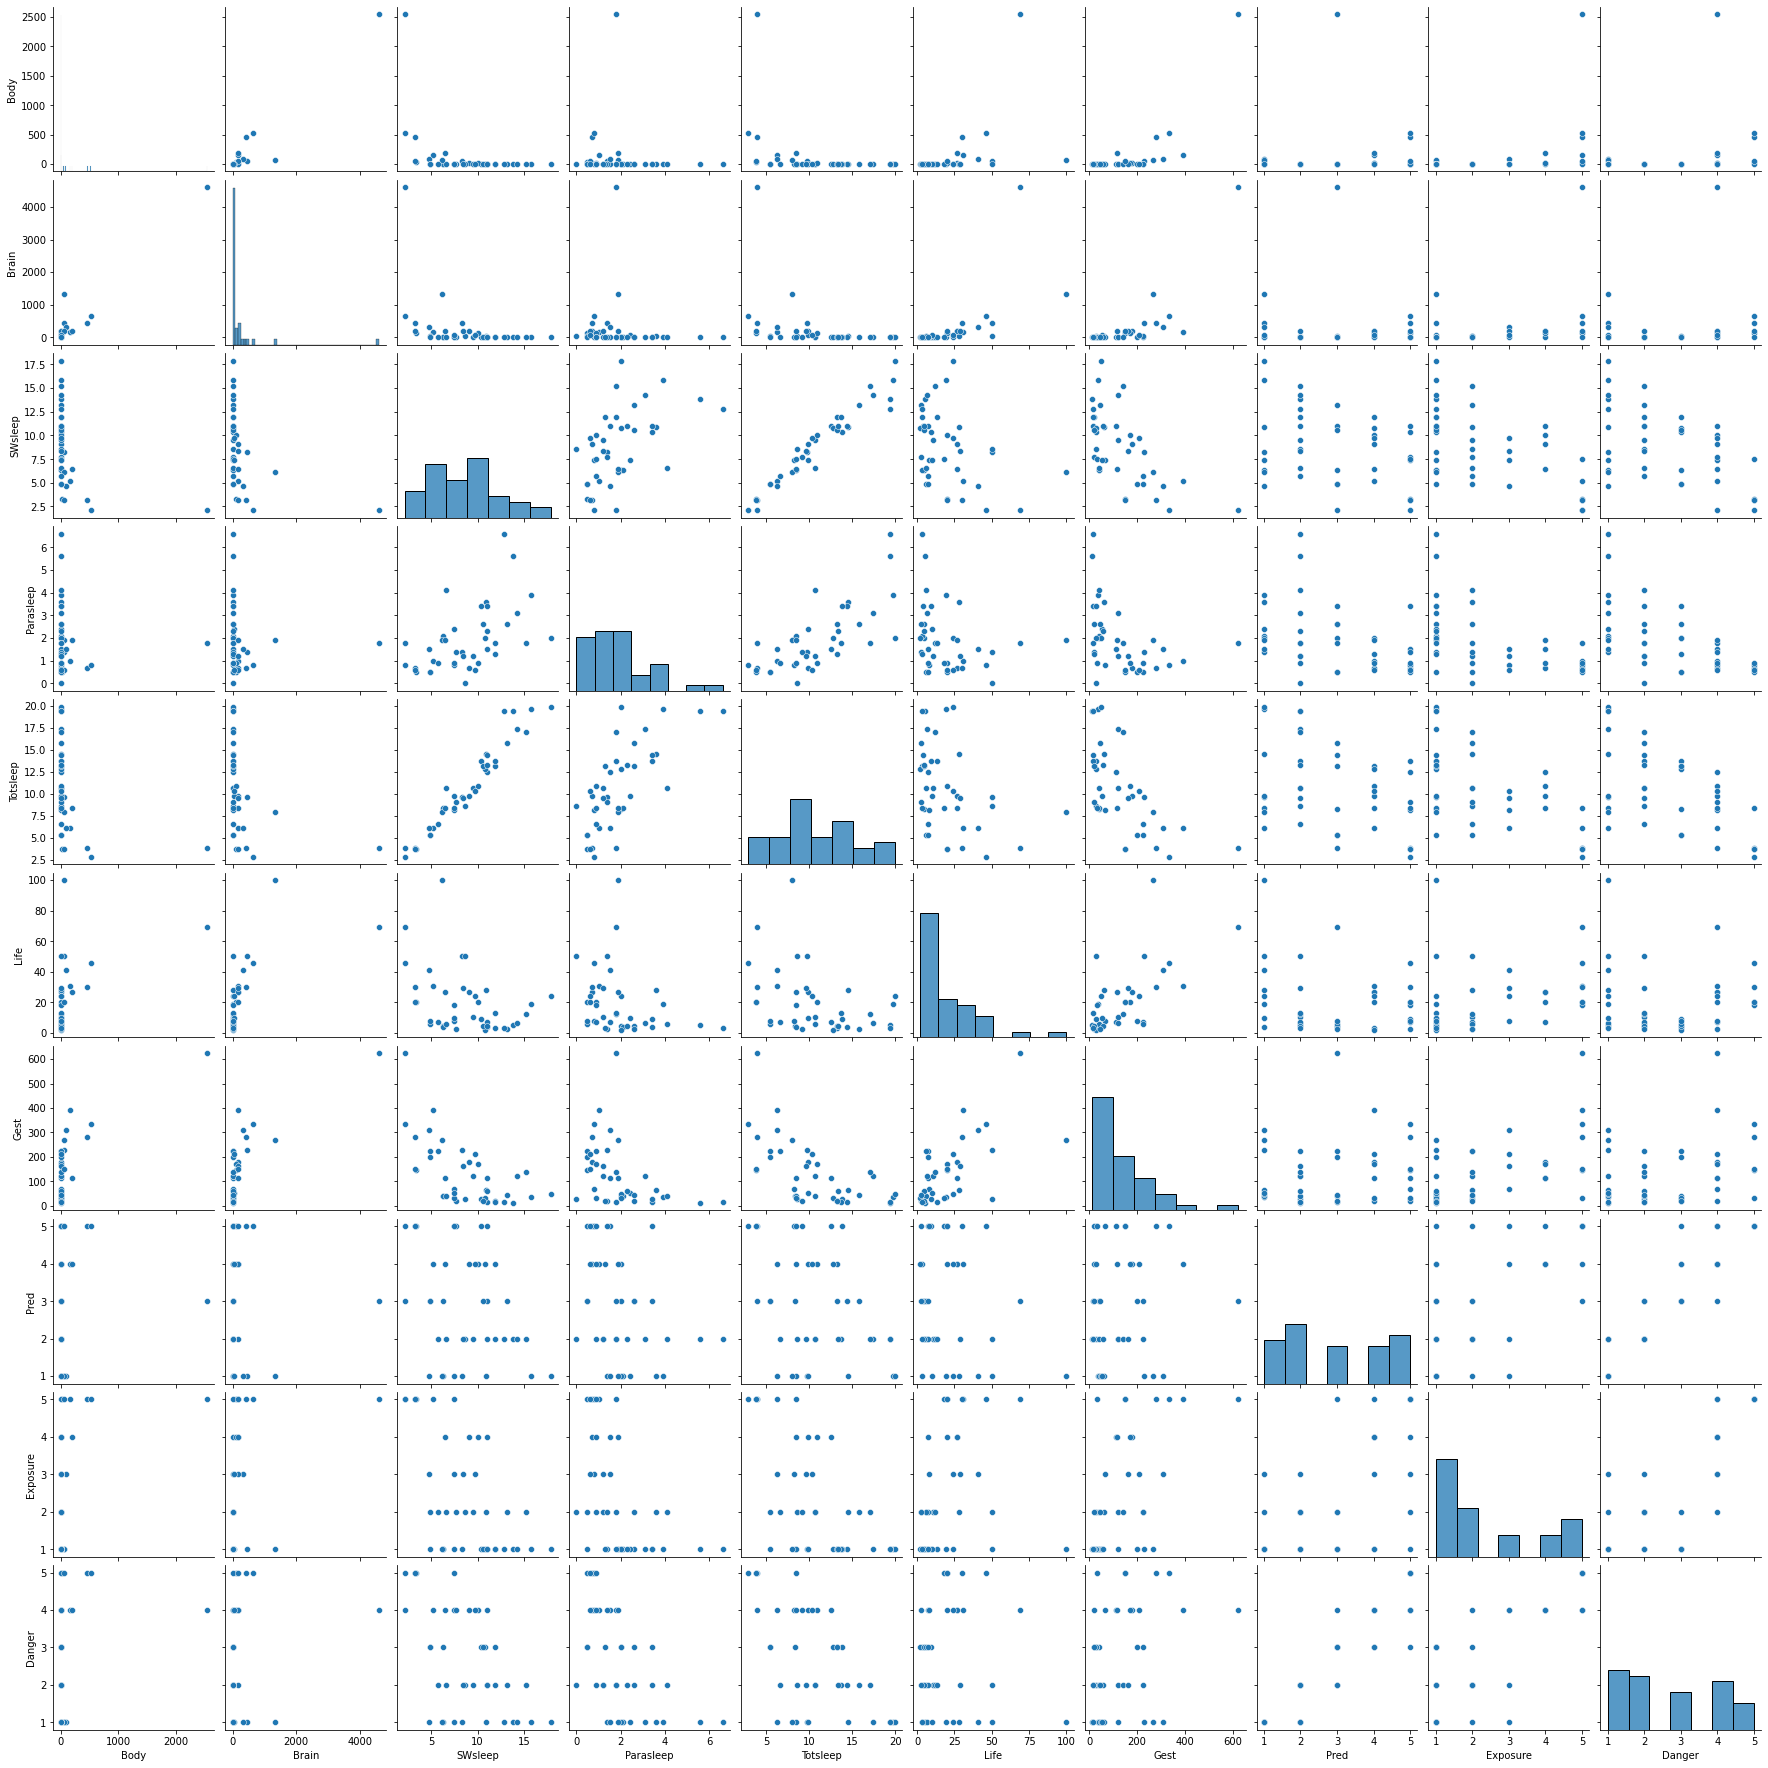

In [31]:
sns.pairplot(data)

**Define Model**

In [32]:
# enter model in format y ~ x
model = ols('Totsleep ~ Parasleep', data=data).fit() # calling 'fit' implements the above OLS equations

print(model.params)

Intercept    6.022119
Parasleep    2.431968
dtype: float64


**Make Predictions & Calculate Residual**

In [33]:
data.iloc[[0]]

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.0,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3


In [34]:
# specify value of x we'd like to predict
x = 2

# specific value of y we want to use to calculate residual
y = 8.3

# extract slope / intercept from model
slope = model.params[1]
intercept = model.params[0]

# use model to make predictions
y_hat = intercept + slope * x

residual = y - y_hat

print(y_hat)
print(residual)

10.88605390562902
-2.5860539056290186


Our model overestimated the amount of sleep by about 2.6

Pretty, close! Not bad.

### Example 3 - Multiple Regression

In the previous section we went over how to do a simple linear regression. We have one feature and one target.

In a multiple regression we have multiple features. Recall the **linear regression form**:

\begin{equation}
\hat{y} = \beta_{0} + \beta_{i} * X_{i} + ...\beta_{n}*X_{n}
\end{equation}

**Single Regression**

\begin{equation}
\hat{y} = \beta_{0} + \beta_{1} * X_{1}
\end{equation}

Where we have one coefficient and one feature.

**Multiple Regression**

\begin{equation}
\hat{y} = \beta_{0} + \beta_{1} * X_{1} + ...\beta_{n}*X_{n}
\end{equation}

Where we have multiple coefficients and multiple features.

We can do a brief examination of our pairplot and interpret right away some features with a linear correlation.

For example: SWSleep & TotalSleep, Gest & Life.

**Read-in Data**

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/j0sephsasson/Pepsi-Training-Course/main/datasets/sleep.csv', index_col=0)
data.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


**Examine Extent of High Correlations**

In [6]:
np.corrcoef(data['Totsleep'], data['Parasleep'])

array([[1.        , 0.71718643],
       [0.71718643, 1.        ]])

In [12]:
np.corrcoef(data['Life'], data['Gest'])

array([[1.        , 0.64638866],
       [0.64638866, 1.        ]])

In [14]:
np.corrcoef(data['SWsleep'], data['Totsleep'])

array([[1.        , 0.96767303],
       [0.96767303, 1.        ]])

**Define Model**

In [4]:
# enter model in format y ~ x
model = ols('Totsleep ~ Parasleep + Gest', data=data).fit() # calling 'fit' implements the above OLS equations

print(model.params)

Intercept    8.884524
Parasleep    1.897137
Gest        -0.014208
dtype: float64


In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Totsleep   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           2.45e-09
Time:                        13:12:34   Log-Likelihood:                -102.82
No. Observations:                  42   AIC:                             211.6
Df Residuals:                      39   BIC:                             216.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8845      1.095      8.113      0.000       6.669      11.100
Parasleep      1.8971      0.358      5.301      0.000       1.173       2.621
Gest          -0.0142      0.004     -3.654      0.001      -0.022      -0.006
==============================================================================
Omnibus:                        4.062   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.131   Jarque-Bera (JB):                2.912
Skew:                           0.605   Prob(JB):                        0.233
Kurtosis:                       3.445   Cond. No.                         459.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see the R2 score is ~0.64, pretty good. We can think of the R2 score as the linear regression "accuracy" - how well did the line fit. Scored from -1 to 1.

**Make Predictions & Calculate Residual**

In [16]:
data.iloc[[0]]

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.0,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3


In [5]:
# specify value of x1 we'd like to predict
x1 = 2

# specify value of x2 we'd like to predict
x2 = 42

# specific value of y we want to use to calculate residual
y = 8.3

# extract slope / intercept from model
b1 = model.params[1]
b2 = model.params[2]
intercept = model.params[0]

# use model to make predictions
y_hat = intercept + (b1 * x1) + (b2 * x2)

residual = y - y_hat

print(y_hat)
print(residual)

12.082051428889908
-3.7820514288899076


## Linear vs Logistic Regression

In the world of ML, you will hear both of these terms often. They are extremely similar, with only one small operation separating the two.

**Linear Regression**

\begin{equation}
\hat{y} = \beta_{0} + \beta_{1} * X_{1} + ...\beta_{n}*X_{n}
\end{equation}

**Logistic Regression**

\begin{equation}
\hat{y} = \sigma(\beta_{0} + \beta_{i} * X_{i} + ...\beta_{n}*X_{n})
\end{equation}

The only difference is that we are wrapping the output of a linear-regression model in another function, denoted by the sigma. This is called the "activation" function.

We are calculating the "logits", more specifically, we are squeezing the output between 0 and 1. This is a hyper-parameter of a ML algorithm, in this example (and one of the most common activation functions) we are using the sigmoid activation.

Logistic regression is utilized for binary classification tasks.

**Example**

In [6]:
def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

linear_out = y_hat
logistic_out = sigmoid(y_hat)

print('LINEAR REG: ', y_hat)
print('LOGISTIC REG: ', logistic_out)

LINEAR REG:  12.082051428889908
LOGISTIC REG:  0.9999943398325937


As you can see, the output value was squeezed between 0 and 1.

In practice, when we pass in a vector to the sigmoid function (because we would have an output for each class), the operation is element-wise, which means it is applied to each element in the vector. 

**Sigmoid Function**

\begin{equation}
\text{sigmoid} = \frac{1}{1+e^{-x}}
\end{equation}

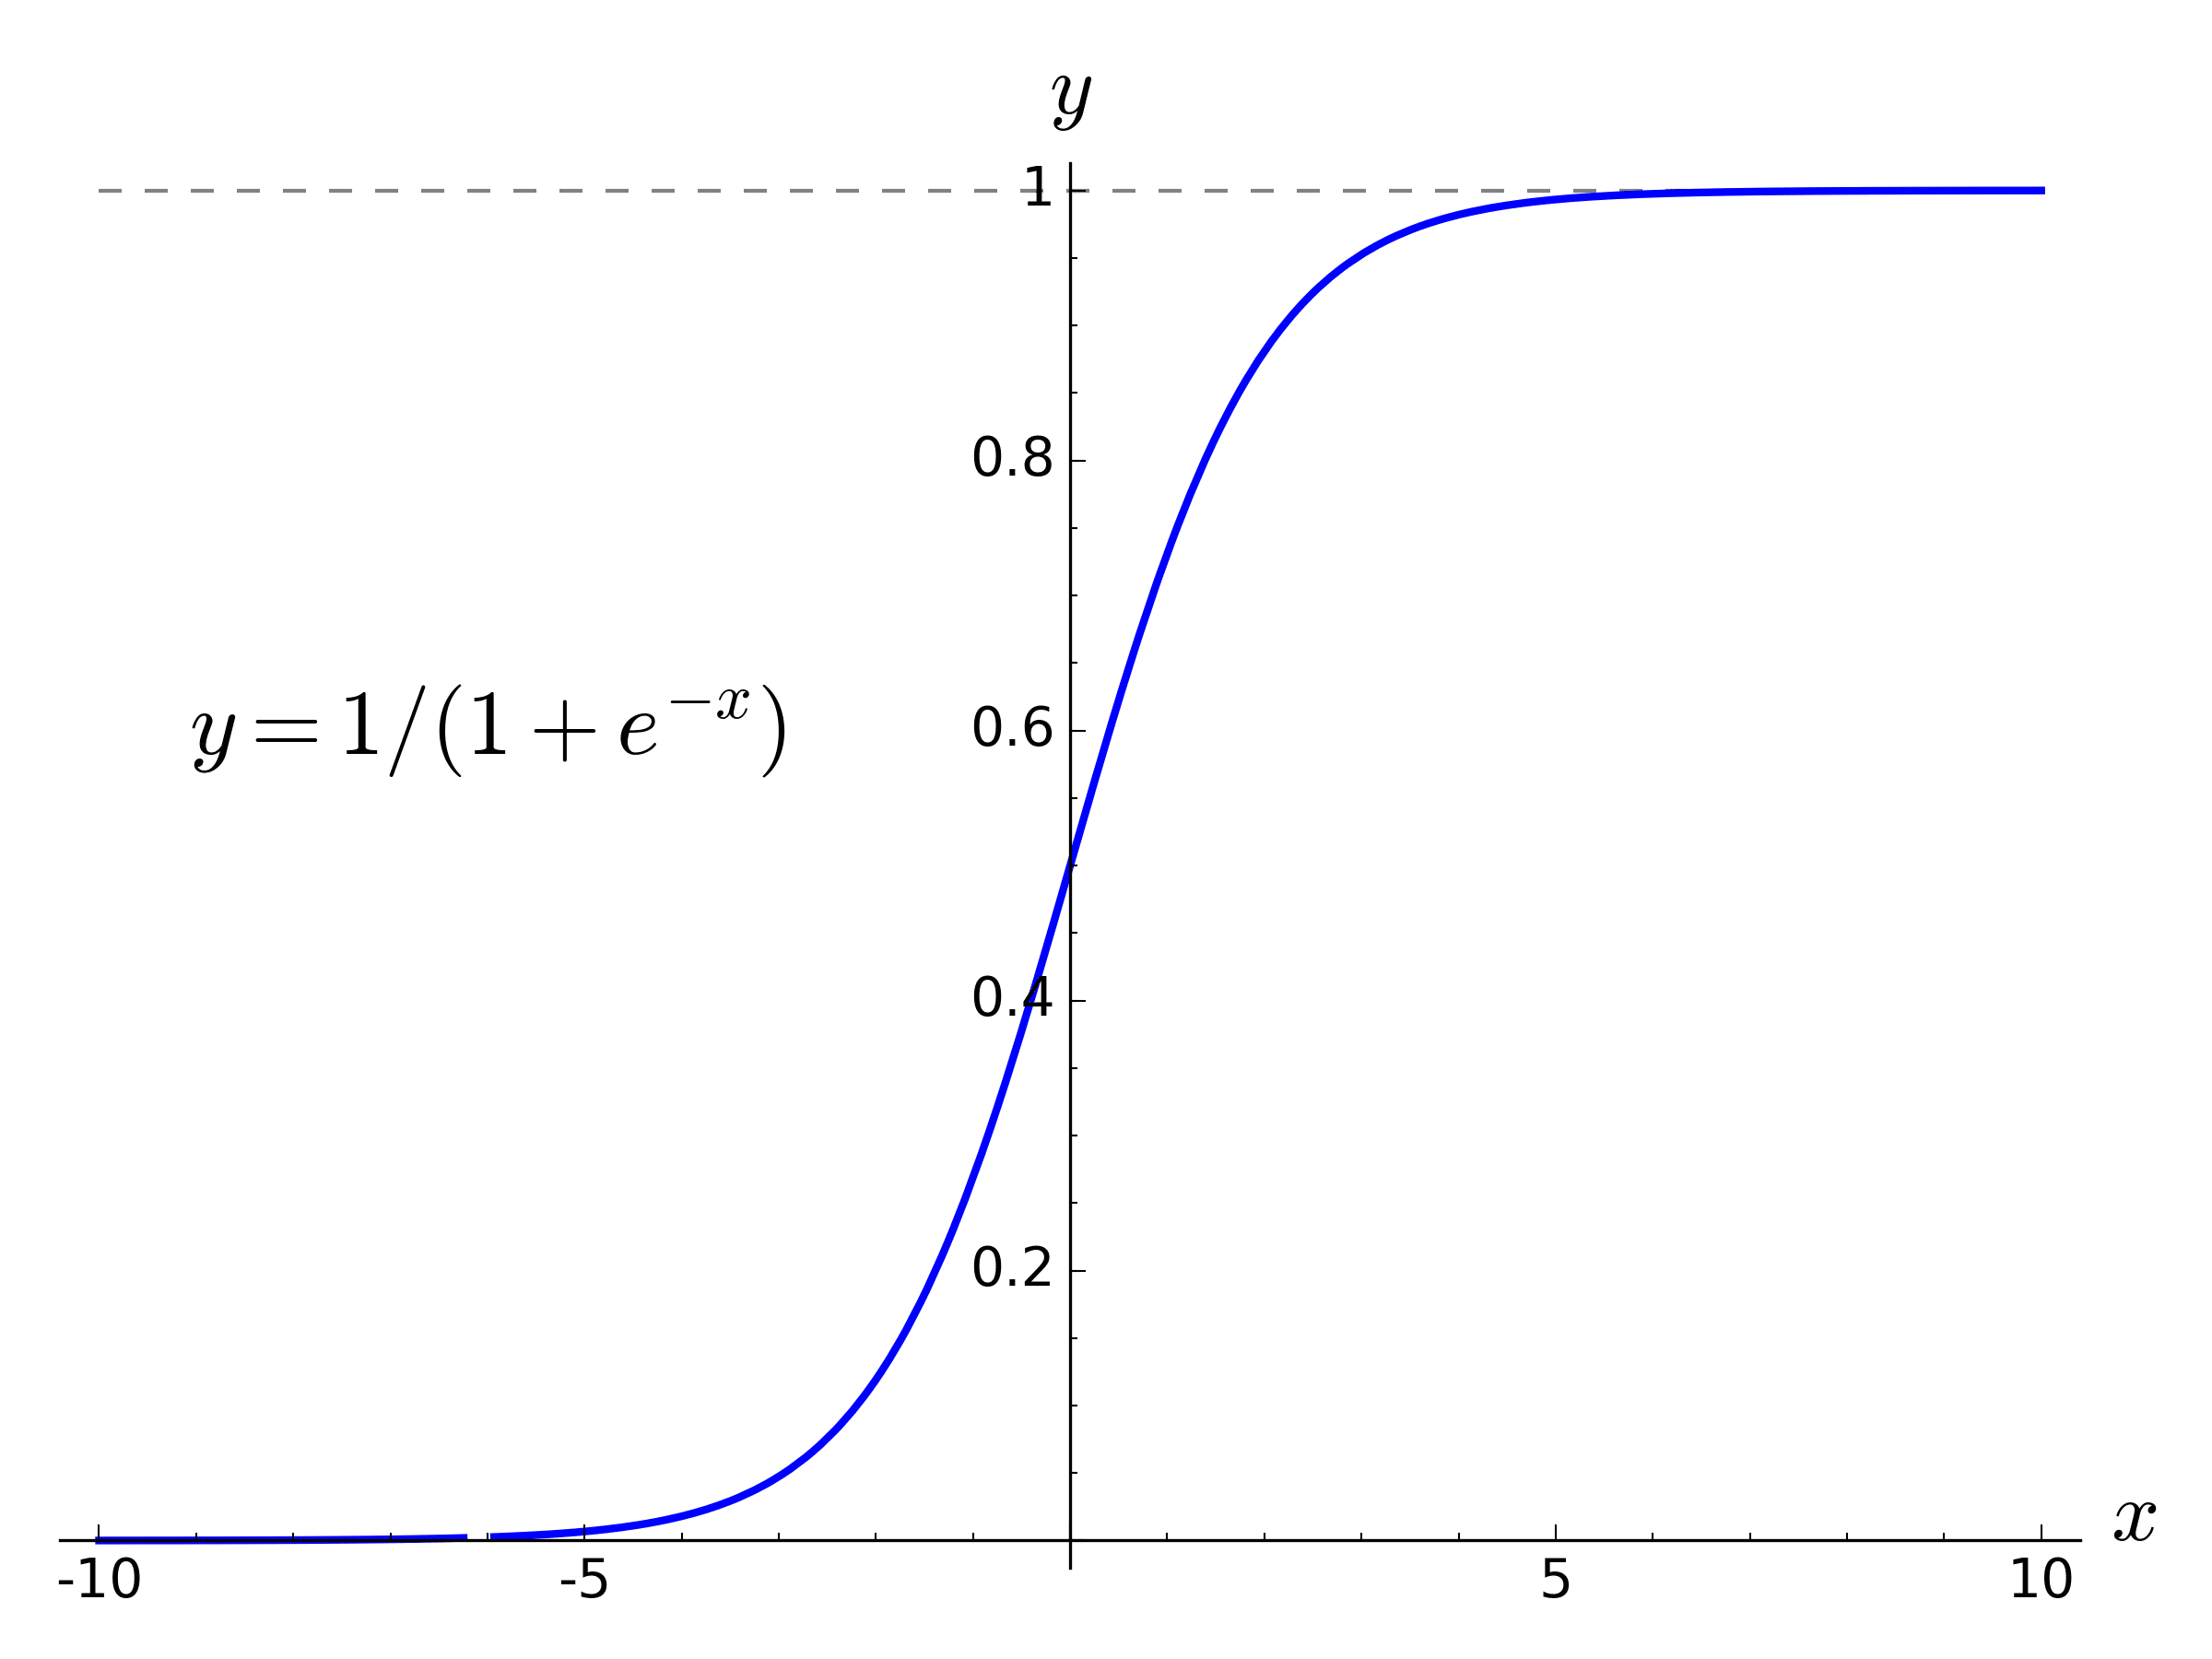

One of the most prevalent computations in AI.

## Conclusion

**Question 1:**

What is the residual if my model predicted 12 but the true value is 18?



1.   30
2.   6
3.   -6





**Question 2:**

If the correlation coefficent (r) is less about 0.5, what does this tell us about our two variables?


1.   They are positively correlated
2.   They are negatively correlated
3.   There is no correlation




**Question 3:**

Given a sample from our feature vector with a value of 6.4 - calculate the prediction for a slope of 2 and intercept at 16


1.   30.8
2.   38.4
3.   24.4





**Question 4:**

What is a scatter plot?


1.   A plot of the values in one feature
2.   A plot of the values in two features
3.   A plot of the values in one feature on the x-axis, and the target on the y-axis




**Bonus - Question 5:**

Define a function that calculates the slope using the OLS regression formula

In [ ]:
## TODO: YOUR CODE HERE ##